# Facebook Data Crawling
After the data is collected, we need to process the data to make it more readable and easier to analyze. We can do some simple visualization to see the data distribution and the relationship between the data. We can also do some simple data cleaning to remove the data that is not needed. In this notebook, we will do some simple data processing on the data we collected from Facebook.

In [1]:
%pip install matplotlib pandas numpy seaborn wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
# Đọc dữ liệu từ tệp CSV
raw_df = pd.read_csv('Data/thehackernews2_preprocessed.csv')

In [4]:
# Hiển thị thông tin về dữ liệu
print(raw_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   post_id                        100 non-null    int64  
 1   text                           100 non-null    object 
 2   post_text                      100 non-null    object 
 3   shared_text                    100 non-null    object 
 4   original_text                  100 non-null    object 
 5   time                           100 non-null    object 
 6   timestamp                      100 non-null    int64  
 7   image                          0 non-null      float64
 8   image_lowquality               100 non-null    object 
 9   images                         100 non-null    object 
 10  images_description             100 non-null    object 
 11  images_lowquality              100 non-null    object 
 12  images_lowquality_description  100 non-null    obje

## Reactions analysis

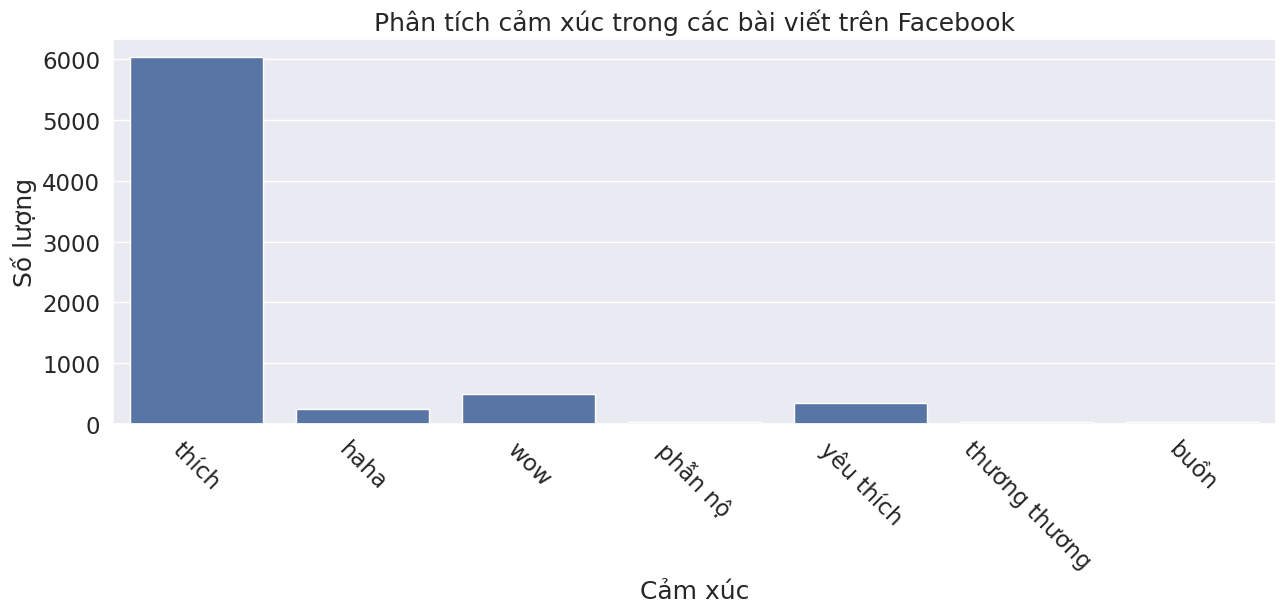

In [5]:
# Chuyển đổi chuỗi trong cột 'reactions' thành từ điển
raw_df['reactions'] = raw_df['reactions'].apply(eval)

# Tính tổng số lượt tương tác cho mỗi bài viết
raw_df['total_interactions'] = raw_df['reactions'].apply(lambda x: sum(x.values())) + raw_df['shares'] + raw_df['comments']

# Tạo DataFrame để lưu trữ thông tin về các loại phản ứng
reaction_df = pd.DataFrame(raw_df['reactions'].tolist())

# Tính tổng số lượt tương tác cho mỗi loại phản ứng
reaction_counts = reaction_df.sum()

# Trực quan hóa số lượng cảm xúc bằng biểu đồ cột
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15, 5)})
sns.set(font_scale=1.5)

fig, ax = plt.subplots()
ax = sns.barplot(x=reaction_counts.index, y=reaction_counts.values)
ax.set_title("Phân tích cảm xúc trong các bài viết trên Facebook")
ax.set_ylabel("Số lượng")
ax.set_xlabel("Cảm xúc")
plt.xticks(rotation=-45)
plt.show()


## Comment and Share analysis


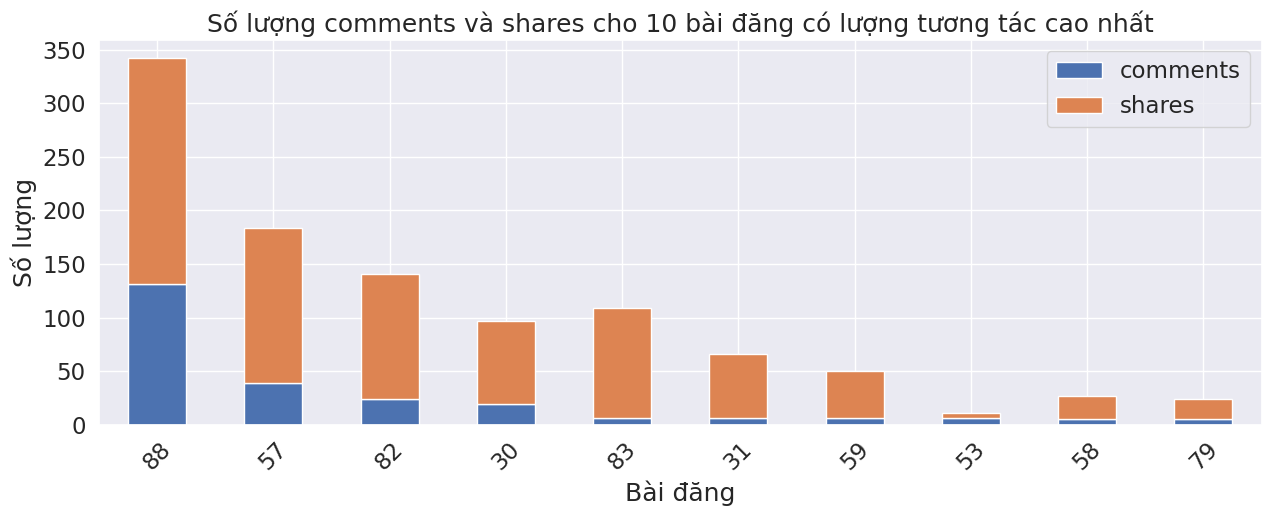

In [22]:
# Lấy 10 bài đăng có số lượng comments và shares cao nhất
top_comments_shares_df = raw_df[['comments', 'shares']].nlargest(10, ['comments', 'shares'])

# Vẽ biểu đồ
top_comments_shares_df.plot(kind='bar', stacked=True)
plt.title("Số lượng comments và shares cho 10 bài đăng có lượng tương tác cao nhất")
plt.ylabel("Số lượng")
plt.xlabel("Bài đăng")
plt.xticks(rotation=45)
plt.show()



## Read all posts

In [7]:
# Đọc tất cả các bài đăng
text = ' '.join(raw_df['post_text'])

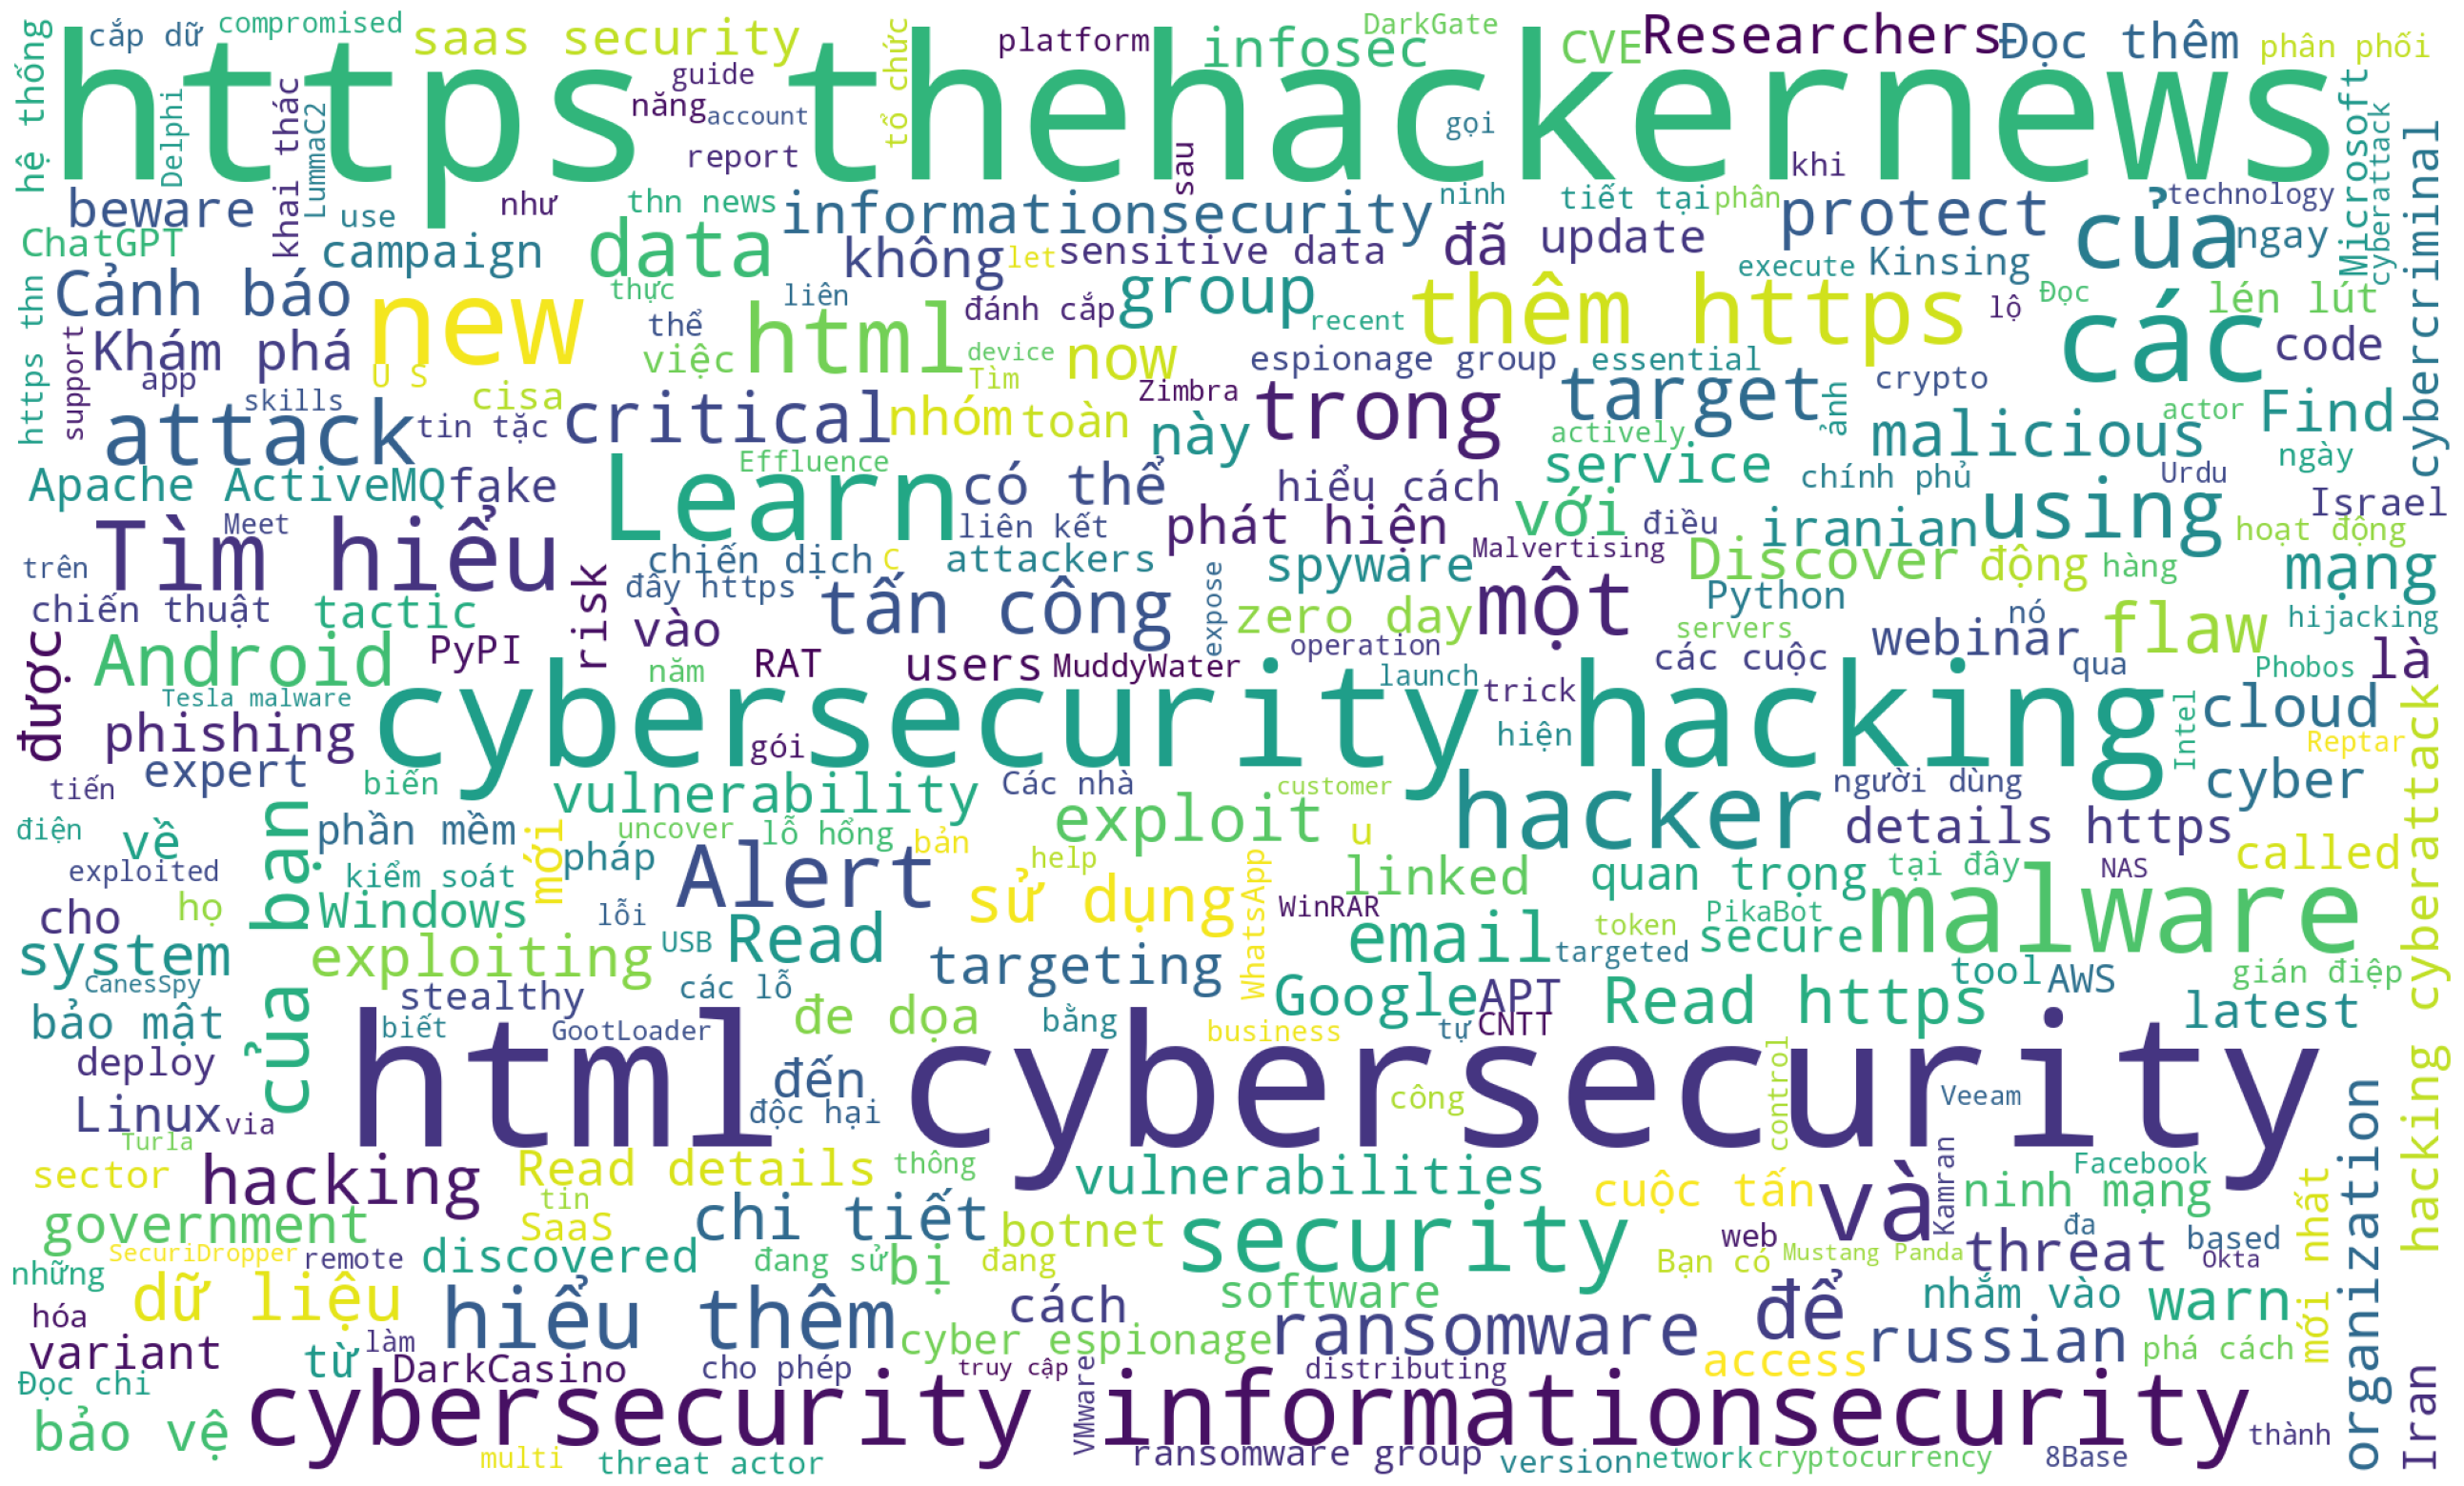

In [8]:
# Tạo WordCloud
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                     ).generate(text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Analysis all posts

In [8]:
# Tìm bài viết có lượt tương tác lớn nhất
max_interaction_post = raw_df.loc[raw_df['total_interactions'].idxmax()]
print("Bài viết có lượt tương tác lớn nhất:\n", max_interaction_post)

Bài viết có lượt tương tác lớn nhất:
 post_id                                                            705754464922473
text                             🔐 Researchers uncover vulnerabilities in 34 Wi...
post_text                        🔐 Researchers uncover vulnerabilities in 34 Wi...
shared_text                      THEHACKERNEWS.COM\nResearchers Find 34 Windows...
original_text                    🔐 Researchers uncover vulnerabilities in 34 Wi...
time                                                           2023-11-02 09:01:21
timestamp                                                               1698915681
image                                                                          NaN
image_lowquality                 https://external.fhan17-1.fna.fbcdn.net/emg1/v...
images                                                                          []
images_description                                                              []
images_lowquality                ['https://extern

In [9]:
# Lấy 10 bài viết có số lượng tương tác cao nhất
top_interactions_df = raw_df.nlargest(10, 'total_interactions')

# In thông tin của 10 bài viết này, bao gồm cả URL
for index, row in top_interactions_df.iterrows():
    print(f"Post ID: {row['post_id']}")
    print(f"Text: {row['text']}")
    print(f"Comments: {row['comments']}")
    print(f"Shares: {row['shares']}")
    print(f"Interactions: {row['total_interactions']}")
    print(f"URL: {row['post_url']}")
    print("\n")


Post ID: 705754464922473
Text: 🔐 Researchers uncover vulnerabilities in 34 Windows drivers that non-privileged hackers can exploit to take control of your device and execute code.

Read details: https://thehackernews.com/2023/11/researchers-find-34-windows-drivers.html

#cybersecurity #hacking

🔐 Các nhà nghiên cứu phát hiện các lỗ hổng trong 34 trình điều khiển Windows mà tin tặc không có quyền lợi có thể lợi dụng để kiểm soát thiết bị của bạn và thực hiện mã.

Đọc chi tiết: https://thehackernews.com/2023/11/researchers-find-34-windows-drivers.html

#cybersecurity #hacking

THEHACKERNEWS.COM
Researchers Find 34 Windows Drivers Vulnerable to Full Device Takeover
Comments: 131
Shares: 211
Interactions: 1251
URL: https://facebook.com/thehackernews/posts/705754464922473


Post ID: 709029964594923
Text: Attention Azure users! Researchers have developed a fully undetectable cloud-based #cryptocurrency miner that can operate without paying any charges.

Get the details here: https://thehacke

In [10]:
# Chuyển đổi cột 'time' thành định dạng datetime
raw_df['time'] = pd.to_datetime(raw_df['time'])

# Tạo cột 'hour' từ cột 'time'
raw_df['hour'] = raw_df['time'].dt.hour

# Tính tổng số bài viết theo giờ
hourly_posts = raw_df['hour'].value_counts().sort_index()

# Tạo DataFrame mới với hai cột là 'time' và 'count'
hourly_posts_df = pd.DataFrame({'time (hour)': hourly_posts.index, 'count': hourly_posts.values})

print("Các mốc thời gian trong ngày mà Fanpage  đăng bài viết:\n")
print(hourly_posts_df)


Các mốc thời gian trong ngày mà Fanpage  đăng bài viết:

    time (hour)  count
0             3      1
1             4      4
2             5      8
3             6      7
4             7      7
5             8      4
6             9      9
7            10      6
8            11      8
9            12     16
10           13     16
11           14      6
12           15      3
13           16      3
14           17      2


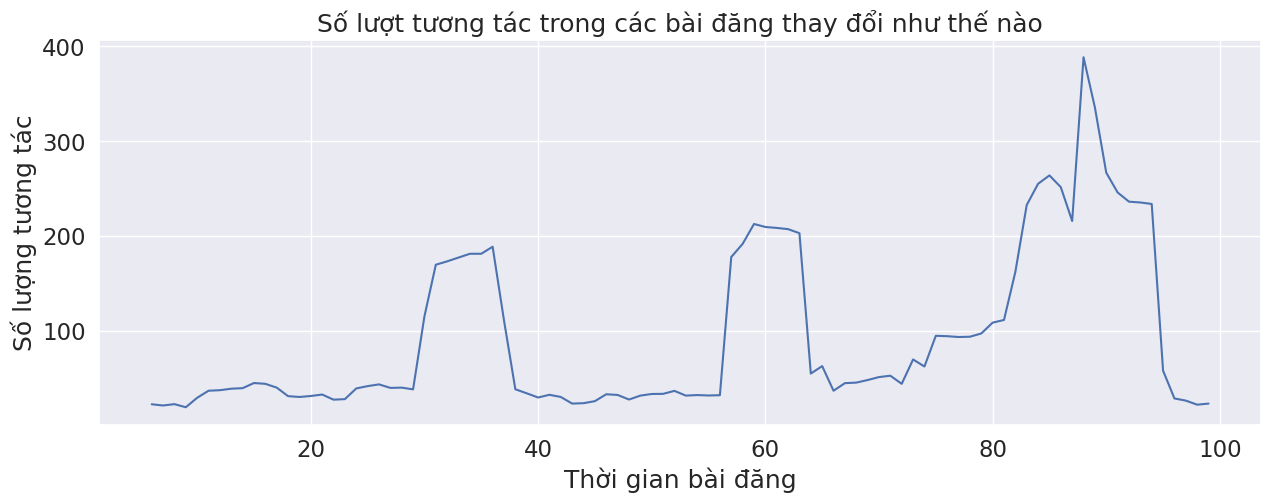

In [11]:
# Xem số lượt tương tác trong các bài đăng thay đổi như thế nào
interaction_trend = raw_df['total_interactions'].rolling(window=7).mean()
interaction_trend.plot()
plt.title("Số lượt tương tác trong các bài đăng thay đổi như thế nào")
plt.xlabel("Thời gian bài đăng")
plt.ylabel("Số lượng tương tác")
plt.show()

In [12]:
# Danh sách các từ không mong muốn
stopwords = ['and', 'to', 'a', 'của', 'các', 'in','the', 'và', 'hiểu', 'more', 'your','of', 'more:', 'công','tìm', 'để:', 'thêm']

# Tính toán số lần xuất hiện của từng từ
word_counts = Counter(word for word in ' '.join(raw_df['post_text']).split() if word not in stopwords)

# Lấy ra 10 từ xuất hiện nhiều nhất
most_common_words = word_counts.most_common(10)

print("Các từ khóa xuất hiện nhiều nhất trong các bài đăng:\n", most_common_words)


Các từ khóa xuất hiện nhiều nhất trong các bài đăng:
 [('#cybersecurity', 135), ('#hacking', 89), ('#informationsecurity', 48), ('Learn', 47), ('#malware', 34), ('Tìm', 30), ('🚨', 24), ('để', 24), ('how', 23), ('thêm:', 23)]


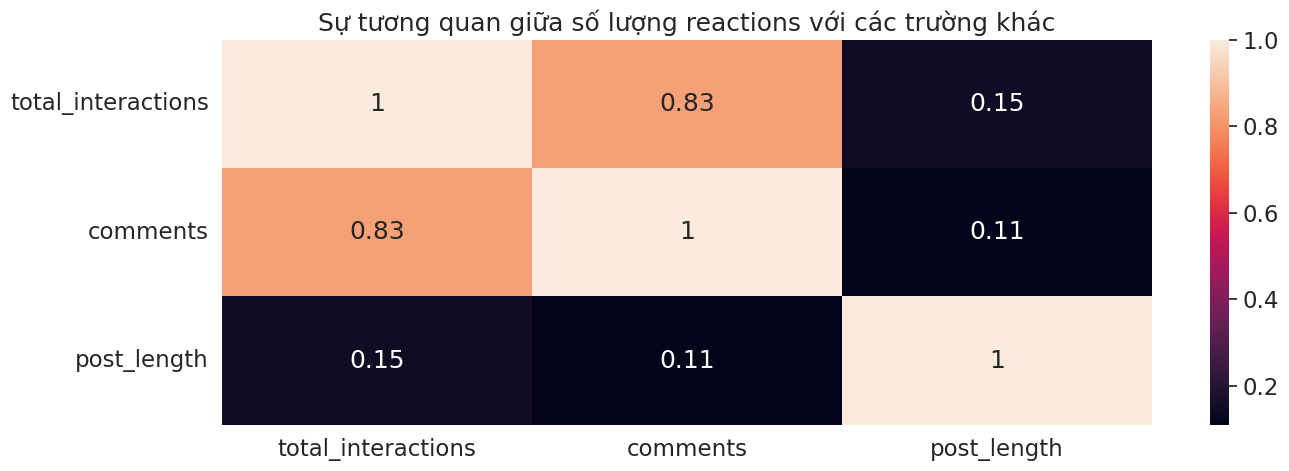

In [13]:
# Tạo một cột mới 'post_length' là độ dài của 'post_text'
raw_df['post_length'] = raw_df['post_text'].apply(len)

# Tìm sự tương quan giữa số lượng reactions với các trường khác như số lượng bình luận, độ dài bài viết
correlation_matrix = raw_df[['total_interactions', 'comments', 'post_length']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title("Sự tương quan giữa số lượng reactions với các trường khác")
plt.show()

In [14]:

# Phân tích nội dung bài đăng
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(raw_df['post_text'])
feature_names = vectorizer.get_feature_names_out()
dense = X.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)
print("TF-IDF cho mỗi bài đăng:\n", df)

TF-IDF cho mỗi bài đăng:
           10        11  134  2011  2015  2022      2023  23583   27   34  ...  \
0   0.000000  0.049600  0.0   0.0   0.0   0.0  0.047201    0.0  0.0  0.0  ...   
1   0.000000  0.048091  0.0   0.0   0.0   0.0  0.045764    0.0  0.0  0.0  ...   
2   0.000000  0.050657  0.0   0.0   0.0   0.0  0.048207    0.0  0.0  0.0  ...   
3   0.000000  0.060711  0.0   0.0   0.0   0.0  0.057774    0.0  0.0  0.0  ...   
4   0.000000  0.049612  0.0   0.0   0.0   0.0  0.047212    0.0  0.0  0.0  ...   
..       ...       ...  ...   ...   ...   ...       ...    ...  ...  ...  ...   
95  0.000000  0.051957  0.0   0.0   0.0   0.0  0.049443    0.0  0.0  0.0  ...   
96  0.000000  0.049664  0.0   0.0   0.0   0.0  0.047261    0.0  0.0  0.0  ...   
97  0.000000  0.046180  0.0   0.0   0.0   0.0  0.087892    0.0  0.0  0.0  ...   
98  0.171543  0.000000  0.0   0.0   0.0   0.0  0.044116    0.0  0.0  0.0  ...   
99  0.194217  0.000000  0.0   0.0   0.0   0.0  0.049947    0.0  0.0  0.0  ...   

 

In [15]:
# Phân tích cảm xúc
raw_df['polarity'] = raw_df['post_text'].apply(lambda x: TextBlob(x).sentiment.polarity)
raw_df['subjectivity'] = raw_df['post_text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
print("Cảm xúc trung bình của các bài đăng:\n", raw_df[['polarity', 'subjectivity']].mean())

Cảm xúc trung bình của các bài đăng:
 polarity        0.190793
subjectivity    0.528931
dtype: float64


In [17]:
# Tạo một danh sách các cụm từ liên quan đến học hack
keywords = ["learn cybersecurity", "learn ethical hacker", "learn hacking", "hacking course", "cybersecurity course","learn"]

# Tìm tất cả các bài viết có chứa ít nhất một trong các cụm từ trên
related_posts_df = raw_df[raw_df['text'].apply(lambda x: any(keyword in x for keyword in keywords))]

# In thông tin của các bài viết này, bao gồm cả URL
for index, row in related_posts_df.iterrows():
    print(f"Post ID: {row['post_id']}")
    print(f"Text: {row['text']}")
    print(f"Comments: {row['comments']}")
    print(f"Shares: {row['shares']}")
    print(f"Interactions: {row['total_interactions']}")
    print(f"URL: {row['post_url']}")
    print("\n")


Post ID: 712659784231941
Text: U.S. Government Dismantles Global IPStorm Botnet Network!

From Windows to #Linux, Mac, and #Android, the botnet turned infected devices into proxies for illegal activities.

Click to learn more: https://thehackernews.com/2023/11/us-takes-down-ipstorm-botnet-russian.html

#malware #cybersecurity #hacking

Chính phủ Hoa Kỳ phá hủy Mạng lưới Botnet IPStorm Toàn cầu!

Từ Windows đến #Linux, Mac, và #Android, botnet đã biến các thiết bị nhiễm trùng thành proxi cho các hoạt động bất hợp pháp.

Nhấp vào để tìm hiểu thêm: https://thehackernews.com/2023/11/us-takes-down-ipstorm-botnet-russian.html

#malware #cybersecurity #hacking

THEHACKERNEWS.COM
U.S. Takes Down IPStorm Botnet, Russian-Moldovan Mastermind Pleads Guilty
Comments: 1
Shares: 7
Interactions: 25
URL: https://facebook.com/thehackernews/posts/712659784231941


